# UAS Project Streamlit 

## Text CAPTCHA Prediction

- **Nama :** [Dimas Rifqi Firmansyah]
  
- **Dataset :** [  https://www.kaggle.com/datasets/fournierp/captcha-version-2-images  ] [  https://www.kaggle.com/datasets/parsasam/captcha-dataset/data  ]
        
- **URL Website :** [https://dimasrifqi123.streamlit.app/]



# Menentukan Pertanyaan Bisnis

- **Specific :** Bagaimana tingkat akurasi model captcha breaker dalam mengidentifikasi karakter pada captcha ?
- **Measurable:** Berapa jumlah karakter yang diidentifikasi dengan benar oleh model dalam 20 percobaan? 
- **Action-oriented :** Bagaimana model captcha breaker dapat ditingkatkan untuk meningkatkan tingkat akurasi pengenalan karakter pada captcha ?
- **Relevan :** Apakah penggunaan teknik deep learning efektif dalam meningkatkan akurasi pengenalan karakter pada captcha ?

# Import Semua Packages/Library yang Digunakan

- import cv2
- import pandas
- import seaborn
- import numpy as np
- import matplotlib.pyplot as plt
- from tensorflow import keras
- import os
- from PIL import Image
- from keras.preprocessing.image import img_to_array, ImageDataGenerator
- from sklearn.preprocessing import LabelEncoder, OneHotEncoder
- from sklearn.model_selection import train_test_split
- from keras.models import Sequential 
- from keras.layers import Dense
- from keras.layers import Conv2D
- from keras.layers import Flatten
- from keras.layers import MaxPooling2D
- from keras.layers import BatchNormalization
- from keras.layers import Dropout
- from keras.layers import Input
- from keras.models import load_model
- from sklearn.metrics import accuracy_score, classification_report
- from imblearn.over_sampling import SMOTE
- from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [82]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from PIL import Image
from keras.preprocessing.image import img_to_array, ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Input
from keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Image Processing

### Take a Sample

Mengidentifikasi setiap huruf yang muncul pada CAPTCHA yang nantinya akan dimasukkan dan dilatih menggunakan model CNN.

In [83]:
path1 = 'Datasets/captcha_images_v2/2b827.png'
path2 = 'Datasets/captcha_images_v2/3bx86.png'

In [84]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

In [85]:
def plot_(img1, img2):
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray') 
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    
    plt.show()

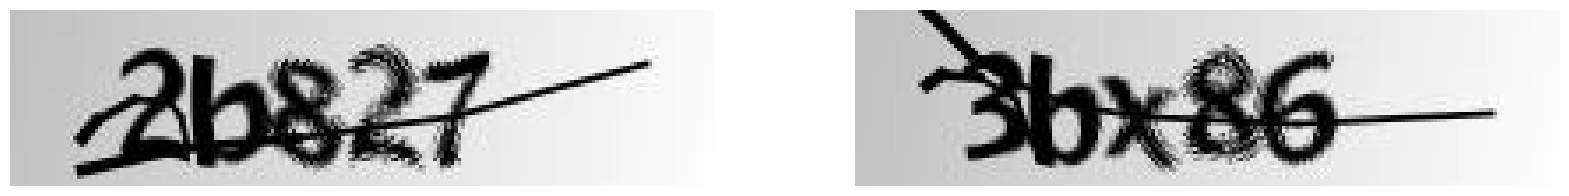

In [86]:
plot_(img1, img2)

### Adaptive Thresholding

Algoritma ini mendapatkan ambang batas pixel yang berbeda untuk wilayah yang berbeda pada gambar yang sama, yang memberikan hasil yang lebih baik untuk gambar dengan pencahayaan yang bervariasi.

In [87]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

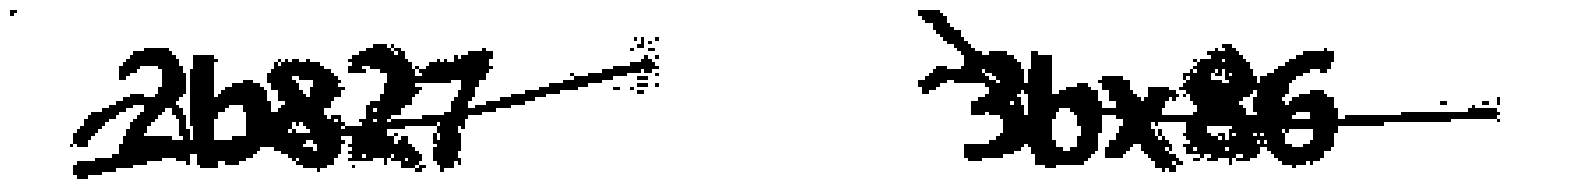

In [88]:
plot_(thresh_img1, thresh_img2)

### Erosion (Pengerutan) 

Ini akan menyusutkan area objek dan menghilangkan noise serta elemen-elemen kecil yang mungkin muncul setelah proses dilation.

In [89]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

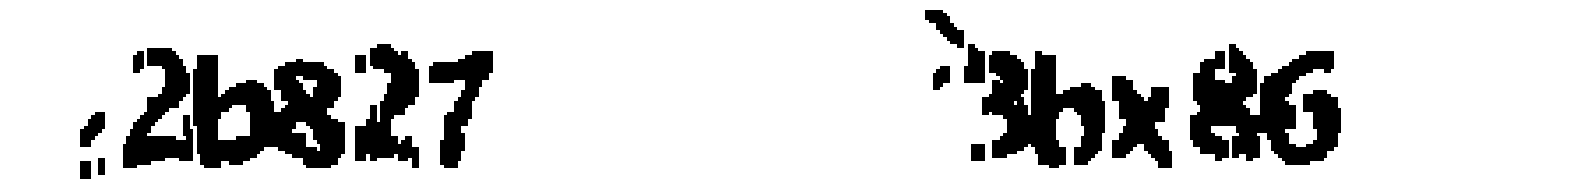

In [90]:
plot_(close_img1, close_img2)

### Dilation (Pembesaran)

Melibatkan kernel yang dipindai pada seluruh gambar. Nilai piksel maksimal dihitung di wilayah kernel dan titik jangkar kernel diperbarui ke nilai tersebut. Hal ini menyebabkan wilayah putih meluas dalam gambar.

In [91]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

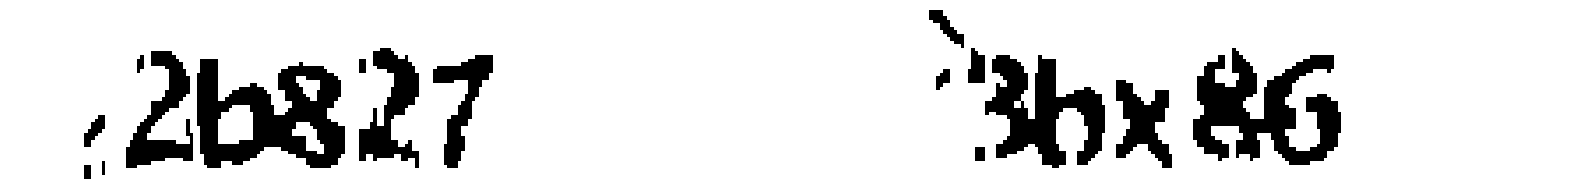

In [92]:
plot_(dilate_img1, dilate_img2)

### Smoothing Images (Blurring)

Melibatkan penggabungan filter low-pass dengan gambar, untuk menghilangkan komponen frekuensi tinggi. Misalnya, noise dan tepi gambar.

In [93]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)

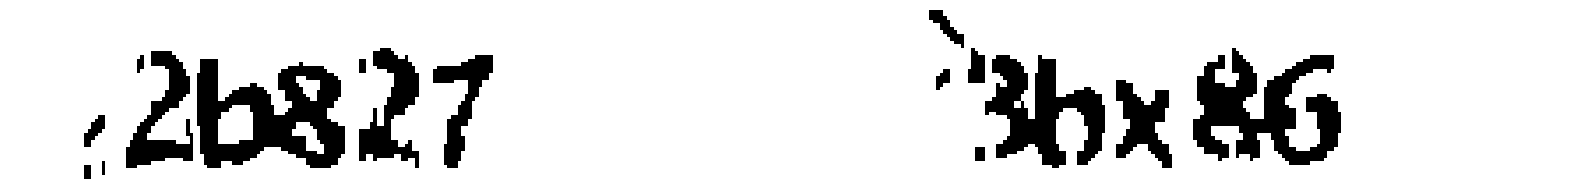

In [94]:
plot_(gauss_img1, gauss_img2)

### Partitioning Batch Normalization

Melibatkan penggabungan filter low-pass dengan gambar, untuk menghilangkan komponen frekuensi tinggi. Misalnya, noise dan tepi gambar.

In [95]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

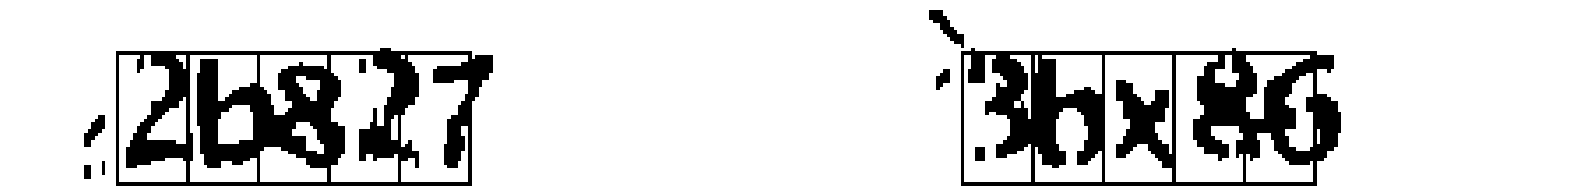

In [96]:
plot_(gauss_img1, gauss_img2)

# Data Wrangling

### Gathering Data

In [97]:
path = 'Datasets/captcha_images_v2/samples/'

### Cleaning Data

In [98]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)

In [99]:
X = []
y = []

for image in os.listdir(path) :
    
    if image[6:] != 'png' :
        continue
    
    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [100]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


In [101]:
X /= 255.0

[]

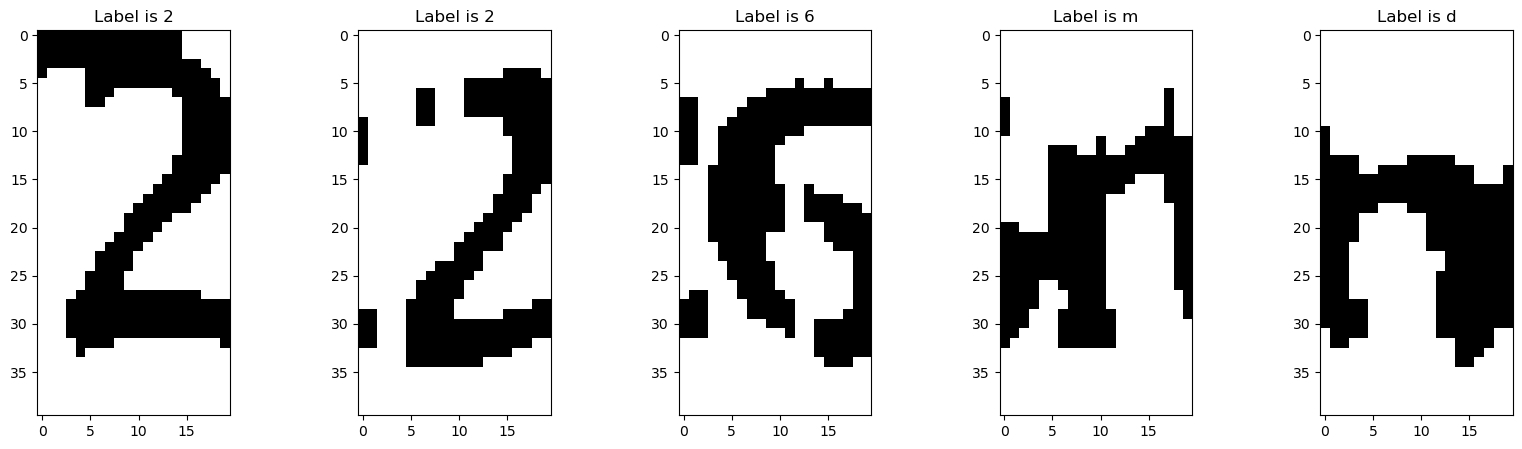

In [102]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

### Data Label Distribution

In [103]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of 7 : 258
Occurance count of m : 275
Occurance count of 3 : 267
Occurance count of y : 232
Occurance count of f : 271
Occurance count of b : 240
Occurance count of n : 525
Occurance count of x : 264
Occurance count of 8 : 264
Occurance count of w : 235
Occurance count of d : 259
Occurance count of 2 : 265
Occurance count of 4 : 284
Occurance count of e : 235
Occurance count of 6 : 259
Occurance count of p : 253
Occurance count of g : 271
Occurance count of 5 : 281
Occurance count of c : 262


In [104]:
 temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})

Text(0.5, 1.0, 'Label distribution in CAPTCHAS')

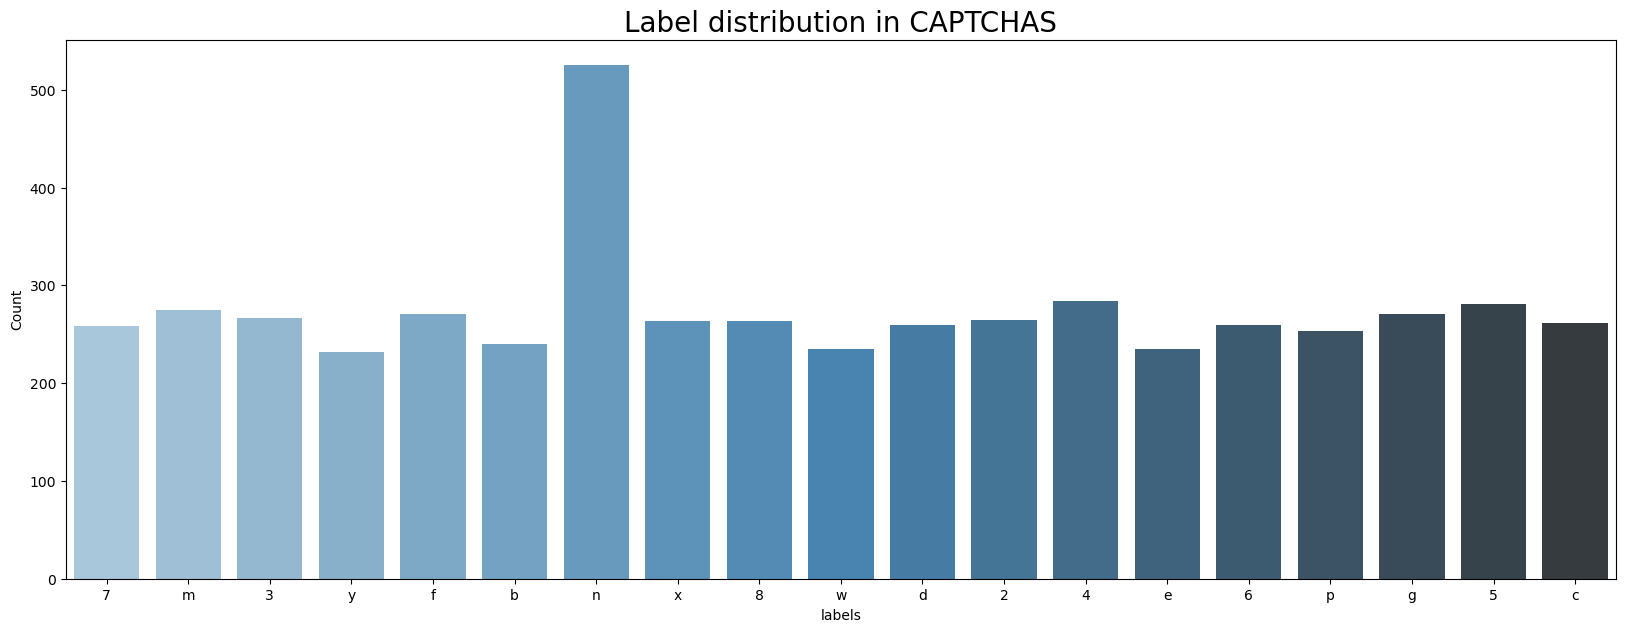

In [105]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in CAPTCHAS', fontsize = 20)

### One Hot Encoding

In [106]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse_output = False).fit_transform(y_combine.reshape(len(y_combine),1))

In [107]:
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter n : 2
label : 0
Count : 265


In [108]:
info = {y_combine[i] : y[i] for i in range(len(y))}

# Train Test Split

In [109]:
print(X.shape)
print(y_one_hot.shape)  # one hot encoded form

(5200, 40, 20, 1)
(5200, 19)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [111]:
y_temp = np.argmax(y_test, axis = 1)

In [112]:
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})

Text(0.5, 1.0, 'Label distribution in test set')

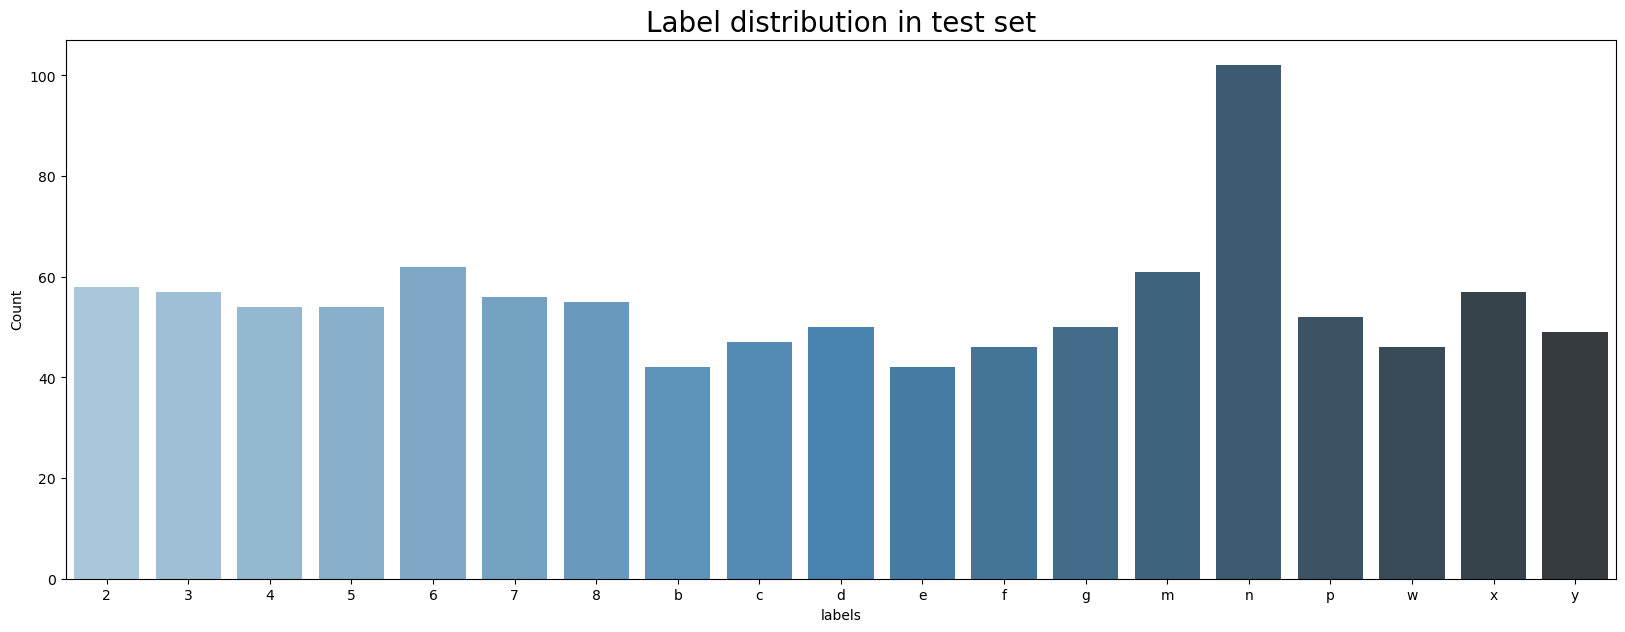

In [113]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in test set', fontsize = 20)

# Model Creation

In [114]:
print(X_train.shape)
print(y_train.shape)

(4160, 40, 20, 1)
(4160, 19)


In [115]:
print(X_test.shape)
print(y_test.shape)

(1040, 40, 20, 1)
(1040, 19)


In [116]:
def conv_layer (filterx) :
    
    model = Sequential()
    
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    
    return model

In [117]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [118]:

def cnn(filter1, filter2, filter3, hidden1, hidden2):
    model = Sequential()
    model.add(Input((40, 20, 1,)))
    
    model.add(Conv2D(filter1, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(filter2, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(filter3, (3, 3), activation='relu'))
    model.add(Flatten())
    
    model.add(Dense(hidden1, activation='relu'))
    model.add(Dense(hidden2, activation='relu'))
    
    model.add(Dense(19, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Data Augmentation and Oversampling

### SMOTE

In [119]:
X_train = np.reshape(X_train, (4160, 40*20*1))

In [120]:
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

In [121]:
print(X_train.shape)
print(y_train.shape)

(8037, 800)
(8037, 19)


In [122]:
X_train = np.reshape(X_train, (8037, 40, 20, 1))

## Oversampled Images

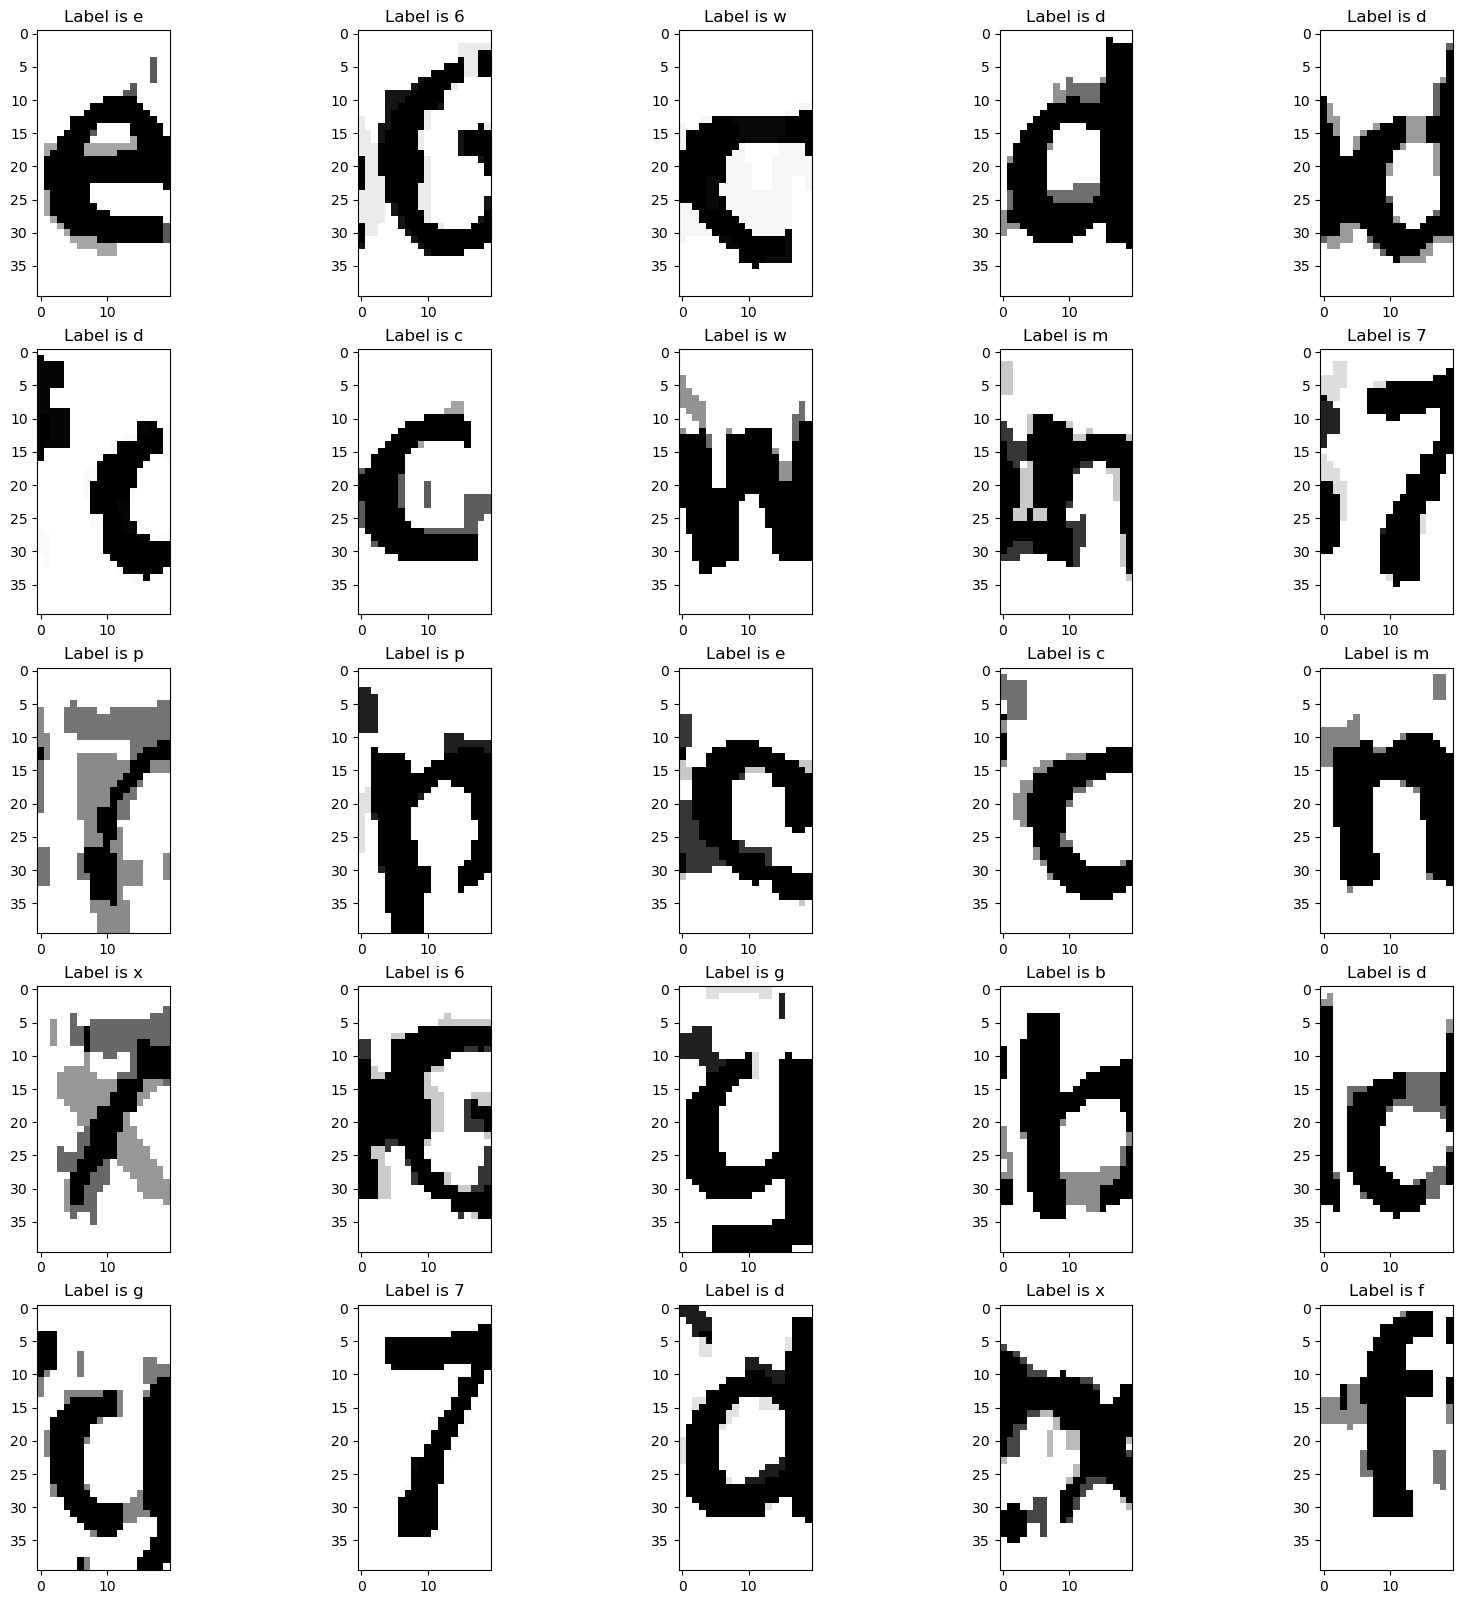

In [123]:
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()

## Image Data Generator

In [124]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)

In [125]:
train_set = traingen.flow(X_train, y_train)

In [126]:
trainX, trainy = train_set.next()

## Rotations and Shifts

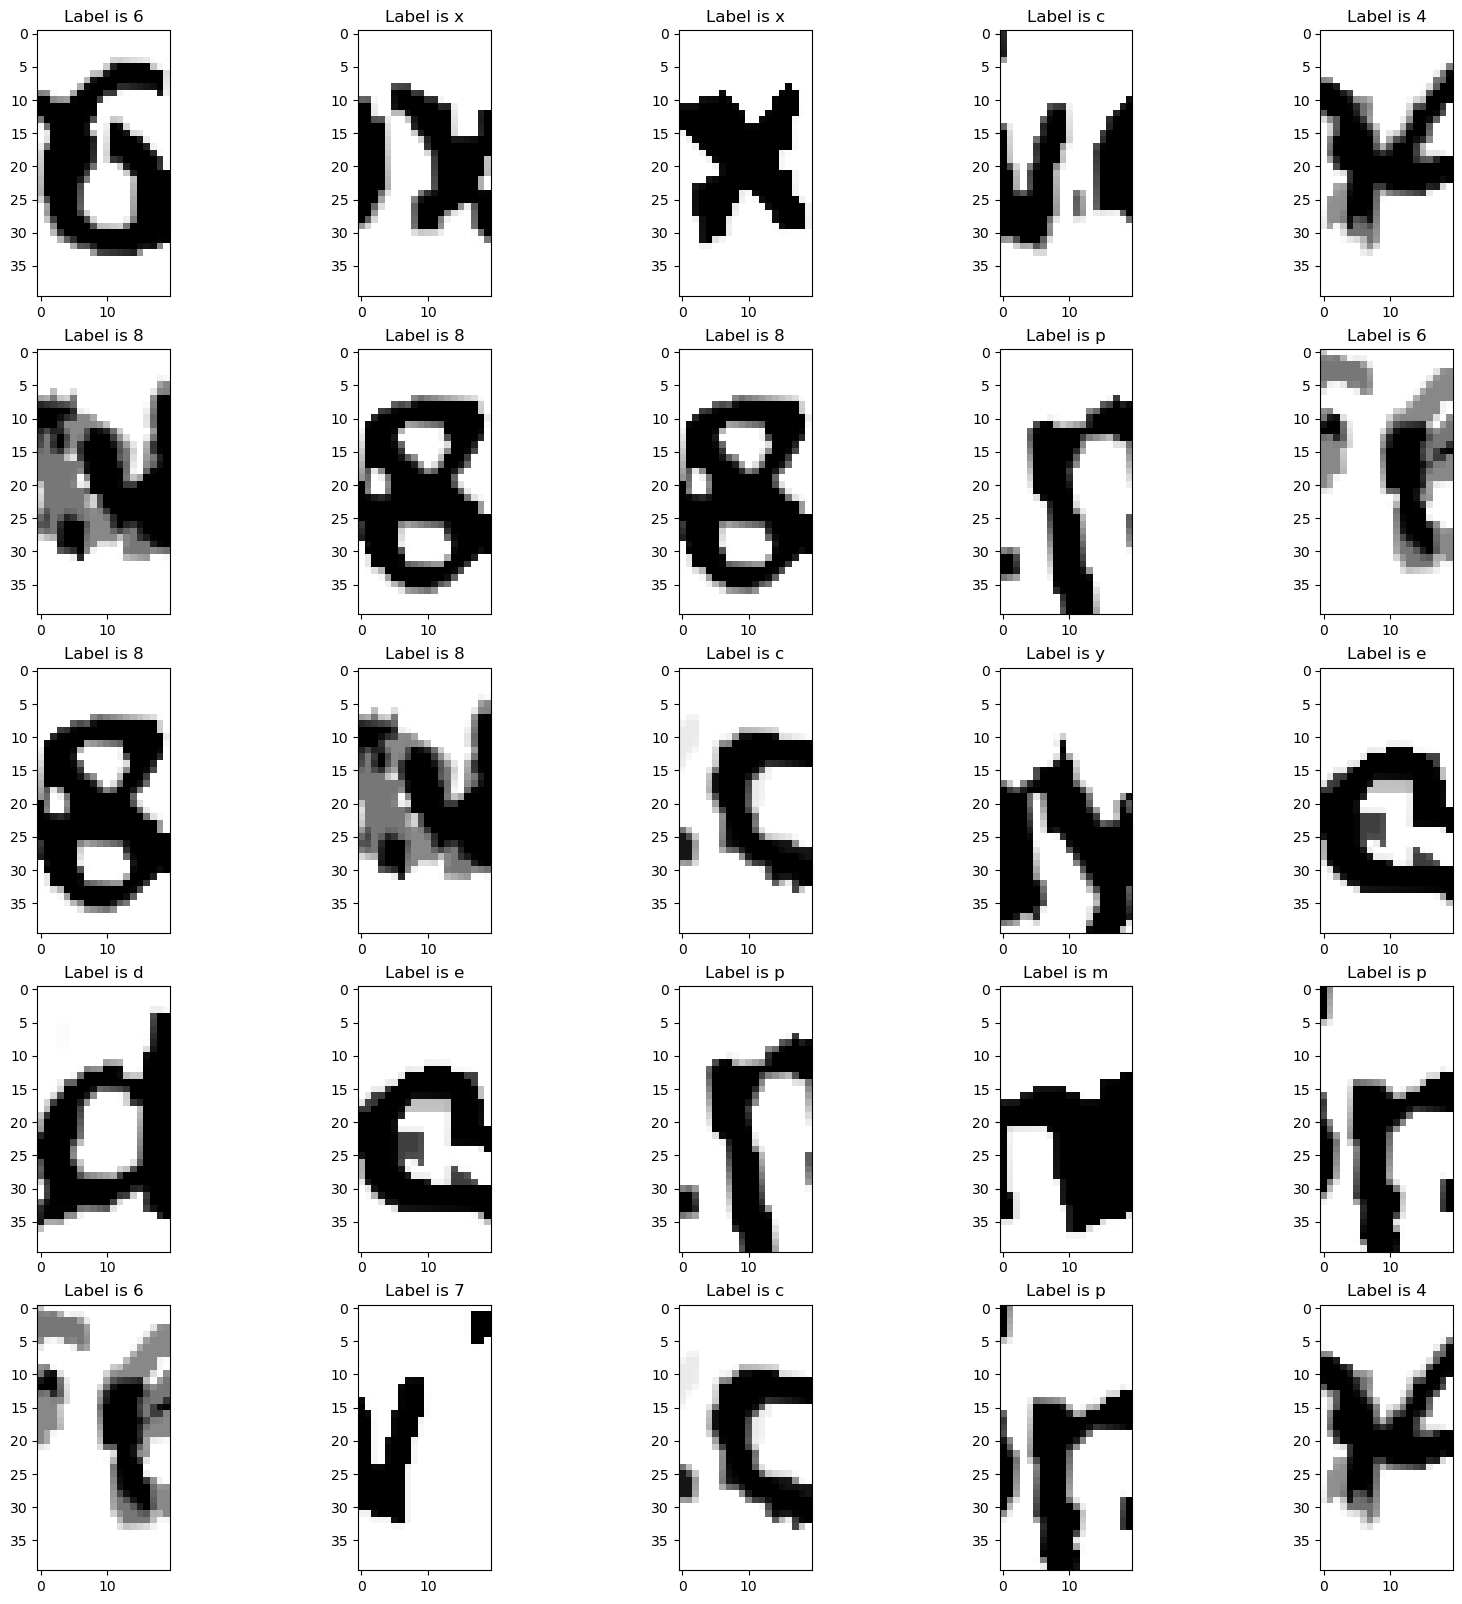

In [127]:
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

# Training Model

In [128]:
model = cnn(128, 32, 16, 32, 32)
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 18, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 9, 128)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 7, 32)         36896     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 3, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 1, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 96)              

### Model Checkpoint and Reduce LROn Plateau

Menggunakan ModelCheckpoint untuk mempertahankan model dengan performa terbaik dan ReduceLROnPlateau untuk mengurangi proses training jika model membaik.

In [129]:
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [130]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [131]:
print(X_train.shape)
print(y_train.shape)

(8037, 40, 20, 1)
(8037, 19)


In [132]:
history = model.fit(traingen.flow(X_train, y_train, batch_size = 32), validation_data = (X_test, y_test), epochs = 100, steps_per_epoch = len(X_train)/32, callbacks = [checkp])

Epoch 1/100


251/251 [============================>.] - ETA: 0s - loss: 2.2998 - accuracy: 0.3051
Epoch 1: val_loss improved from inf to 1.52757, saving model to .\result_model.h5
251/251 [==============================] - 14s 37ms/step - loss: 2.2974 - accuracy: 0.3056 - val_loss: 1.5276 - val_accuracy: 0.5577
Epoch 2/100


C:\Users\dimas\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/251 [============================>.] - ETA: 0s - loss: 1.2607 - accuracy: 0.6330
Epoch 2: val_loss improved from 1.52757 to 1.05047, saving model to .\result_model.h5
251/251 [==============================] - 8s 30ms/step - loss: 1.2616 - accuracy: 0.6327 - val_loss: 1.0505 - val_accuracy: 0.6904
Epoch 3/100
252/251 [==============================] - ETA: 0s - loss: 0.9512 - accuracy: 0.7213
Epoch 3: val_loss improved from 1.05047 to 0.93167, saving model to .\result_model.h5
251/251 [==============================] - 9s 36ms/step - loss: 0.9512 - accuracy: 0.7213 - val_loss: 0.9317 - val_accuracy: 0.7269
Epoch 4/100
252/251 [==============================] - ETA: 0s - loss: 0.8447 - accuracy: 0.7555
Epoch 4: val_loss improved from 0.93167 to 0.83245, saving model to .\result_model.h5
251/251 [==============================] - 8s 32ms/step - loss: 0.8447 - accuracy: 0.7555 - val_loss: 0.8324 - val_accuracy: 0.7587
Epoch 5/100
251/251 [============================>.] - ETA: 0s - lo

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

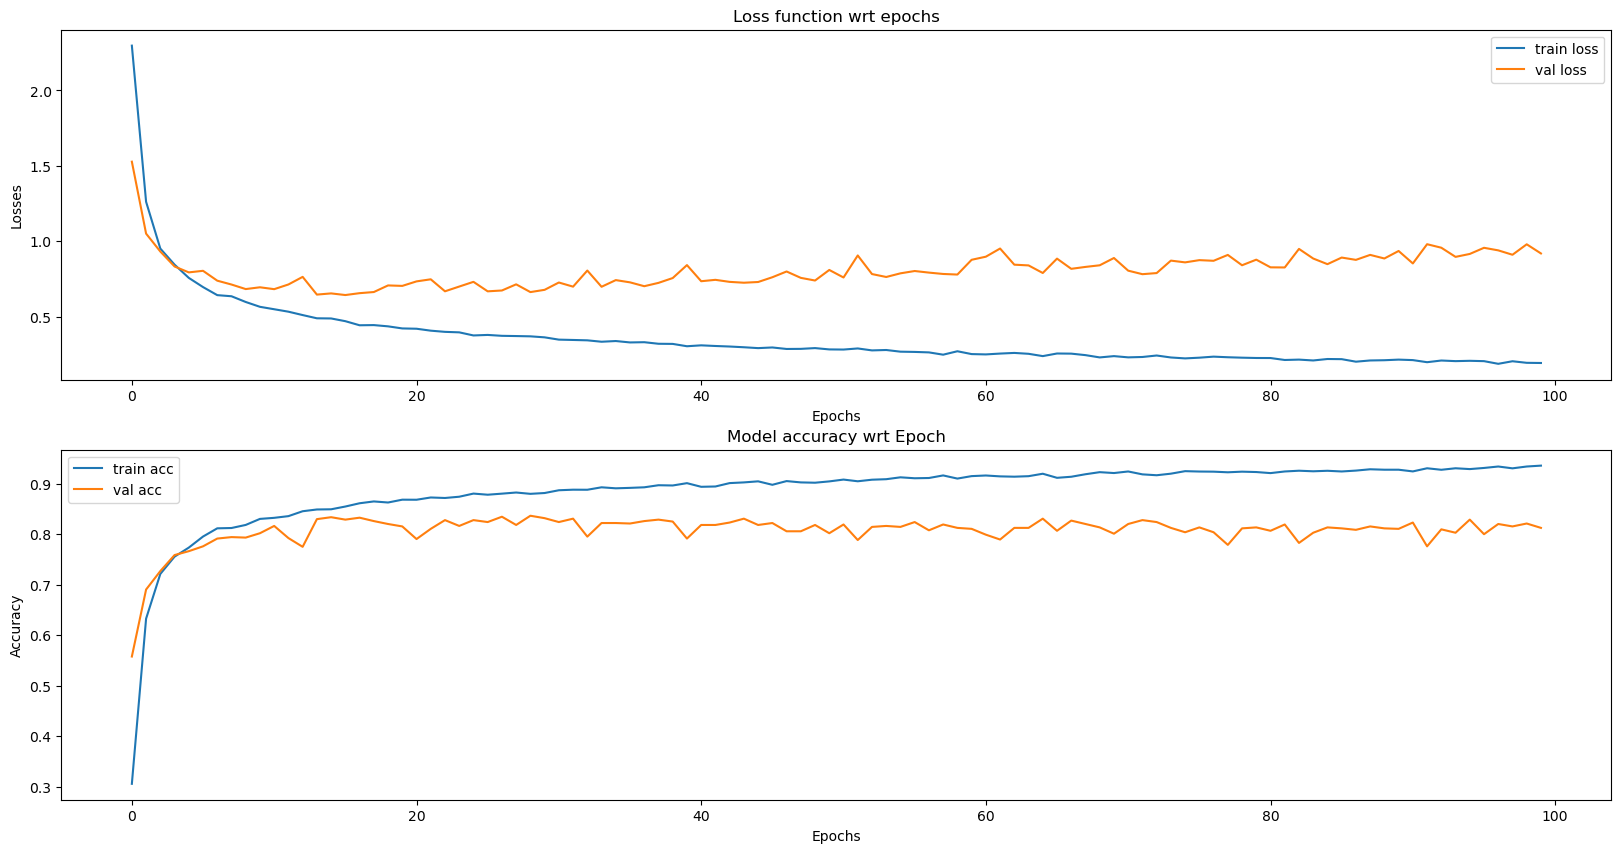

In [133]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

# Evaluasi Model

In [134]:
model = load_model('./result_model.h5')

In [135]:
pred = model.predict(X_test)

33/33 [==============================] - 1s 6ms/step


In [136]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [137]:
target_name = []
for i in sorted(info) :
    target_name.append(info[i])

In [138]:
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [139]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.8288461538461539
              precision    recall  f1-score   support

           2       0.95      0.91      0.93        58
           3       0.96      0.95      0.96        57
           4       0.91      0.93      0.92        54
           5       0.88      0.93      0.90        54
           6       0.96      0.81      0.88        62
           7       0.88      0.91      0.89        56
           8       0.93      0.91      0.92        55
           b       0.95      0.98      0.96        42
           c       0.64      0.91      0.75        47
           d       0.88      0.72      0.79        50
           e       0.81      0.81      0.81        42
           f       0.68      0.93      0.79        46
           g       0.79      0.62      0.70        50
           m       0.64      0.46      0.53        61
           n       0.70      0.75      0.72       102
           p       0.90      0.85      0.87        52
           w       0.78      0.83      0.80        

# Testing

In [140]:
def get_demo (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    
    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

In [141]:
def get_demo (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    
    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

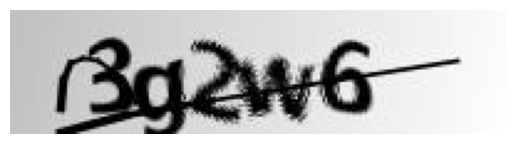

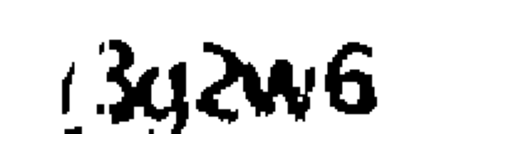

1/1 [==============================] - 0s 25ms/step
3
g
2
w
w
3g2w6.png


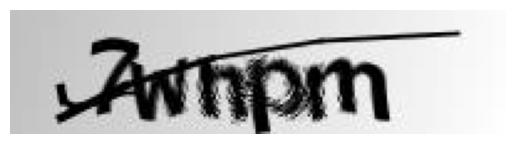

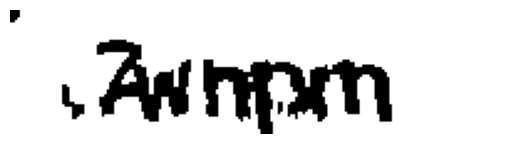

1/1 [==============================] - 0s 16ms/step
7
w
n
p
m
7wnpm.png


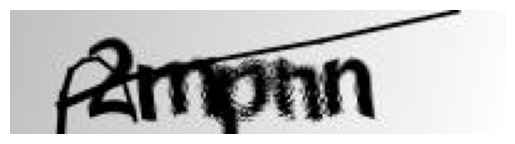

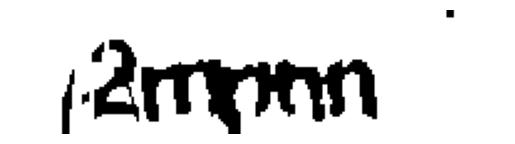

1/1 [==============================] - 0s 32ms/step
2
n
p
b
m
2mpnn.png


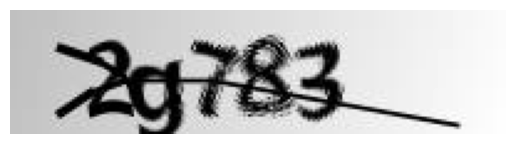

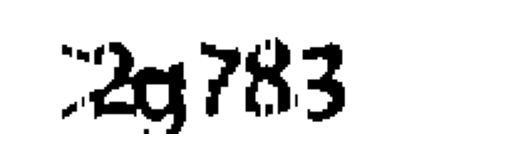

1/1 [==============================] - 0s 32ms/step
2
g
7
8
3
2g783.png


In [142]:
get_demo('Datasets/captcha_images_v2/3g2w6.png')
get_demo('Datasets/captcha_images_v2/7wnpm.png')
get_demo('Datasets/captcha_images_v2/2mpnn.png')
get_demo('Datasets/captcha_images_v2/2g783.png')

# Exploratory Data Analysis (EDA)

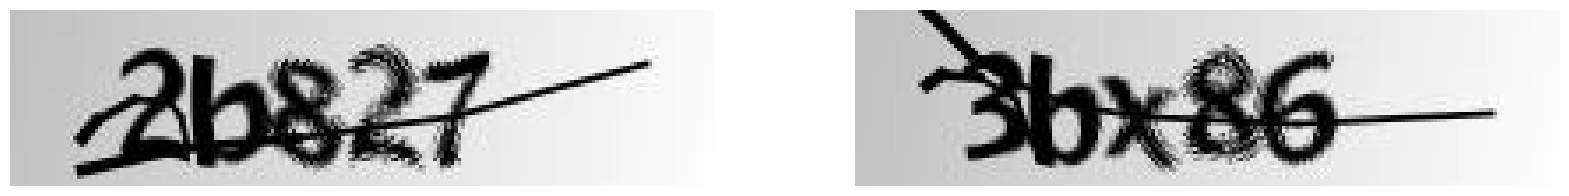

In [143]:
plot_(img1, img2)

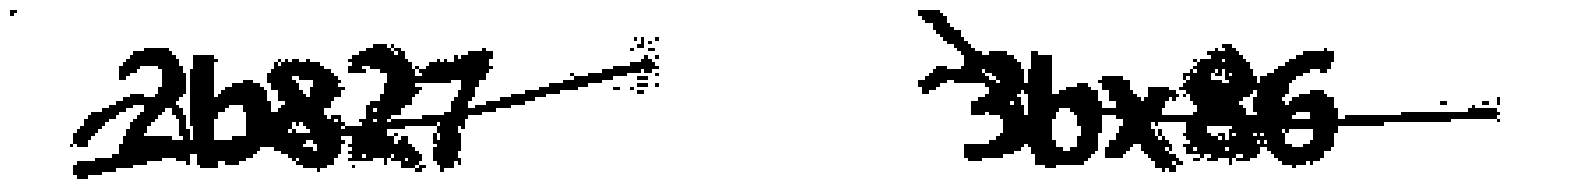

In [144]:
plot_(thresh_img1, thresh_img2)

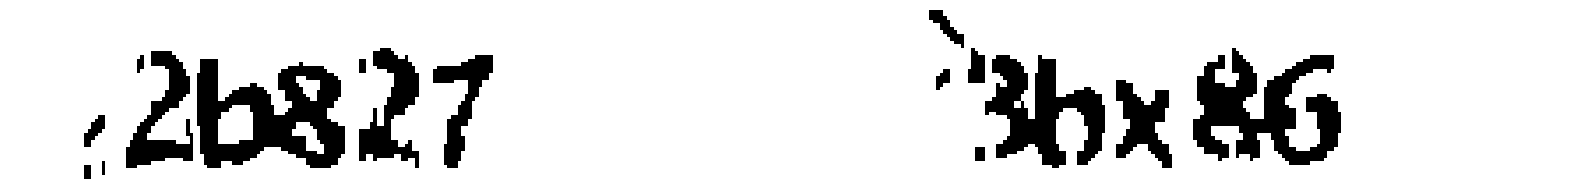

In [145]:
plot_(dilate_img1, dilate_img2)

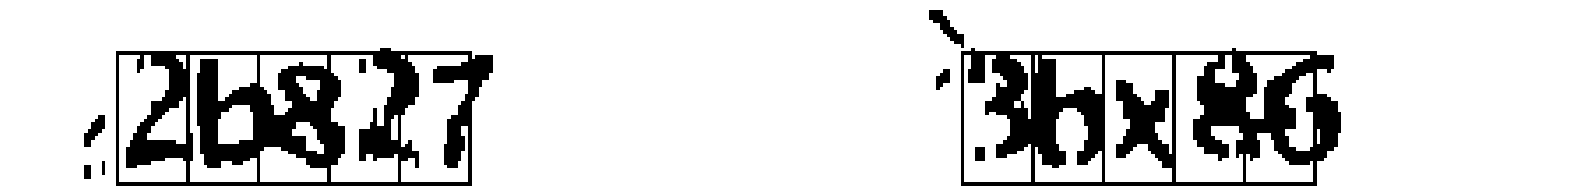

In [146]:
plot_(gauss_img1, gauss_img2)

[]

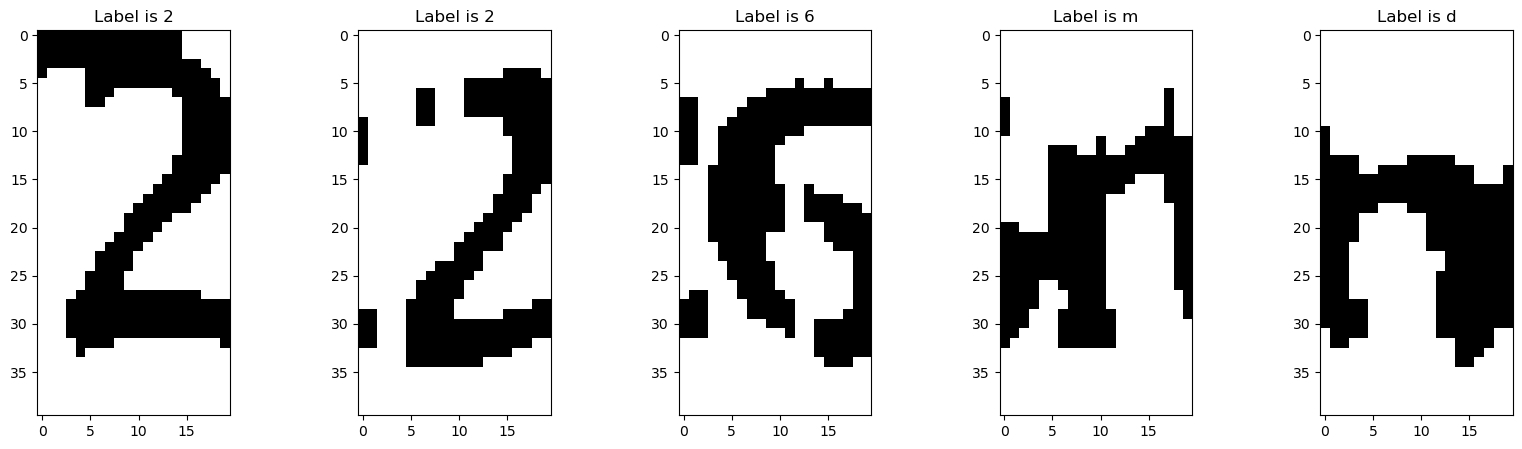

In [147]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

Text(0.5, 1.0, 'Label distribution in CAPTCHAS')

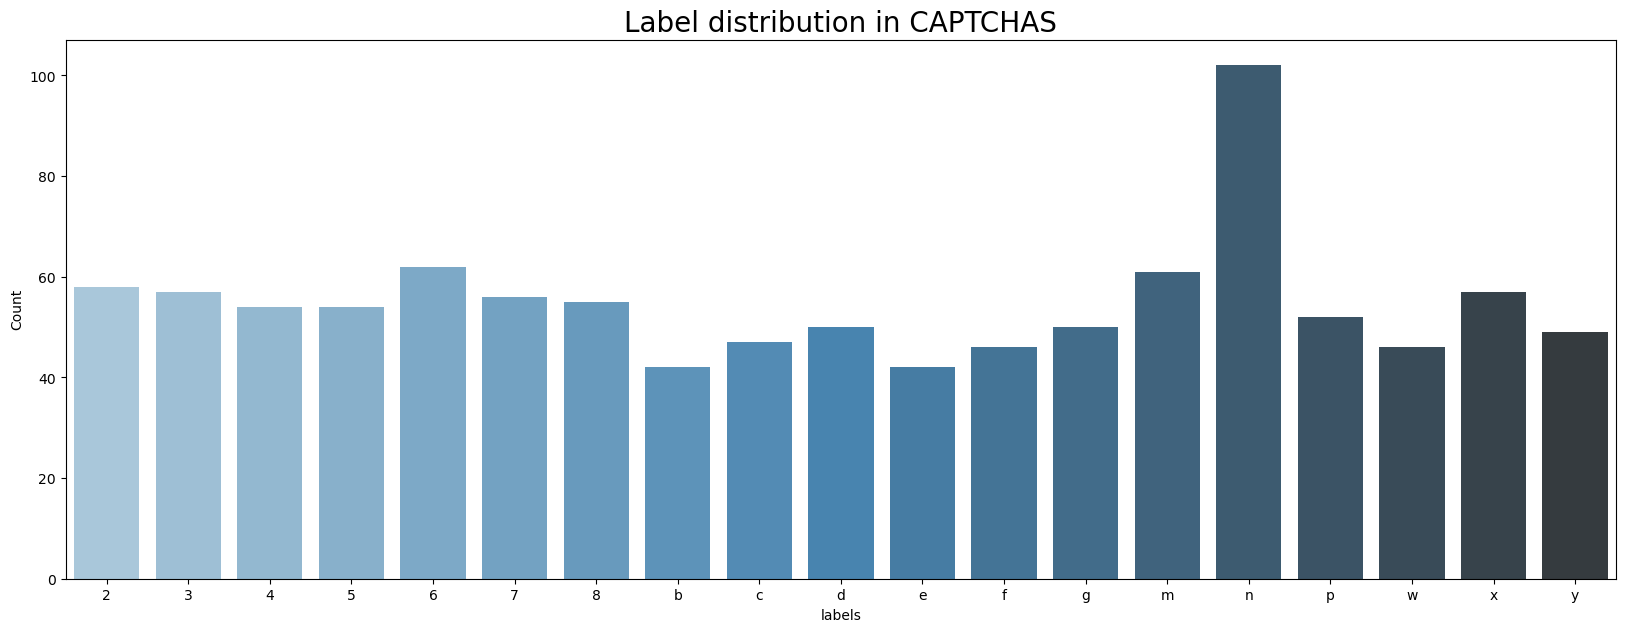

In [148]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in CAPTCHAS', fontsize = 20)

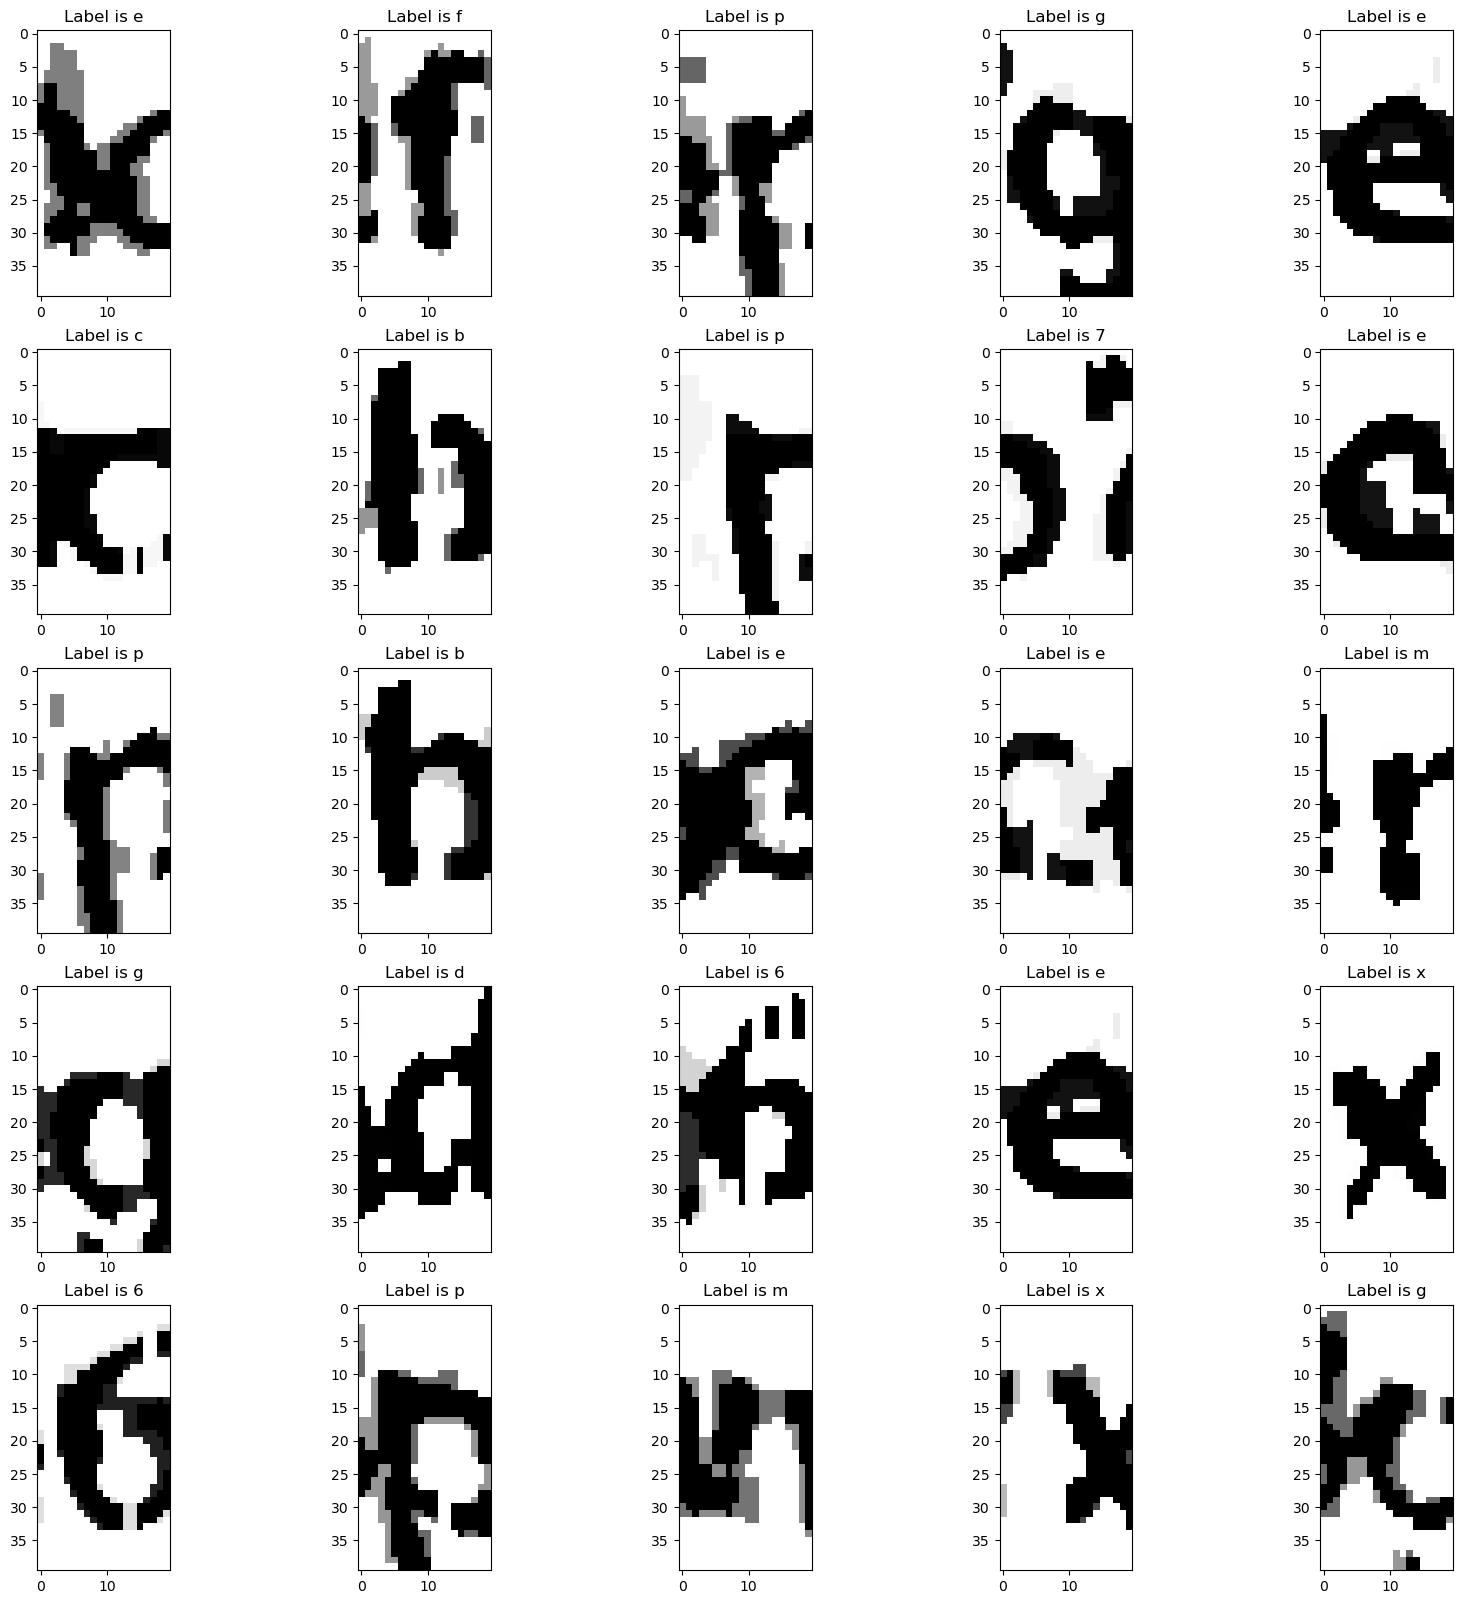

In [149]:
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()

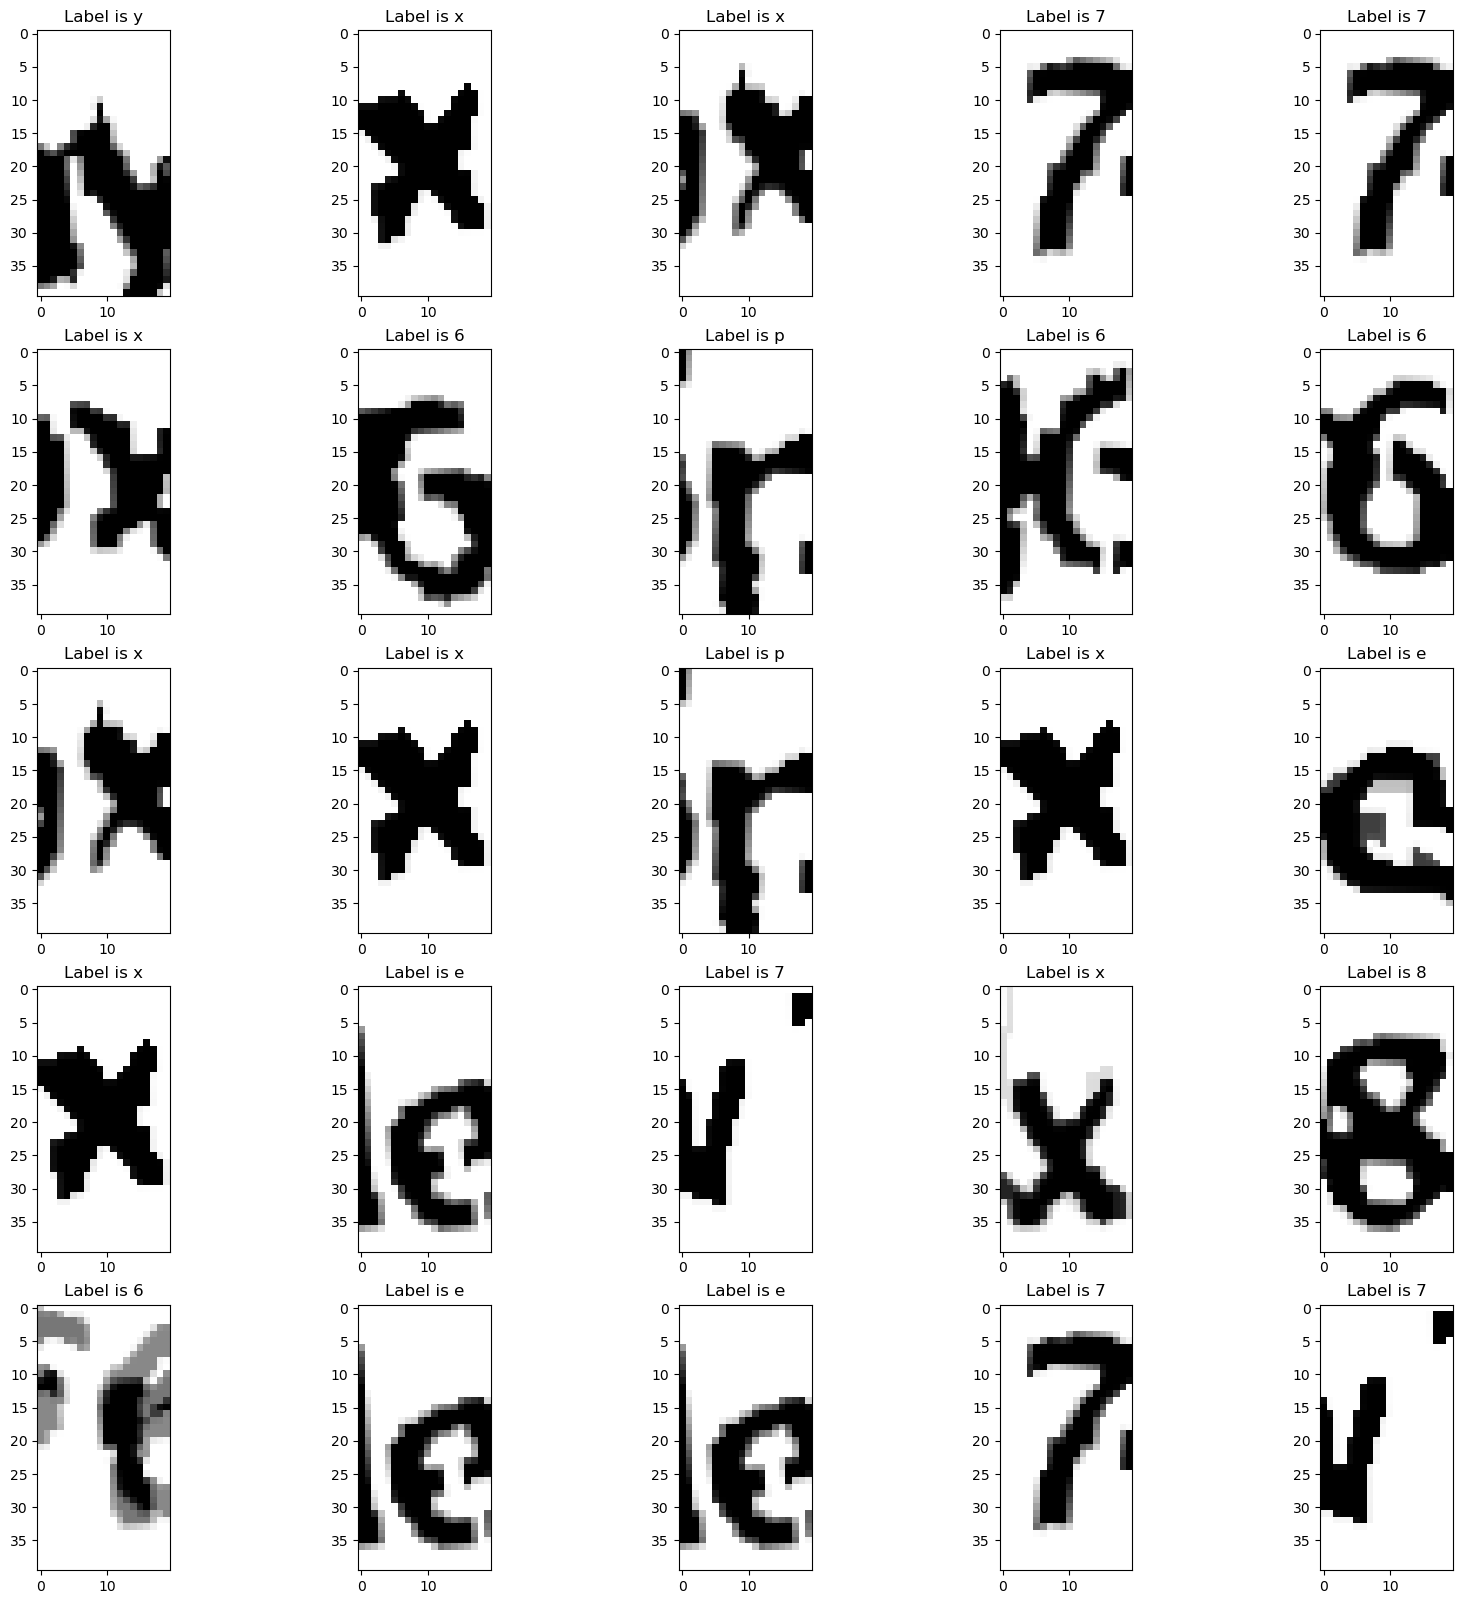

In [150]:
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

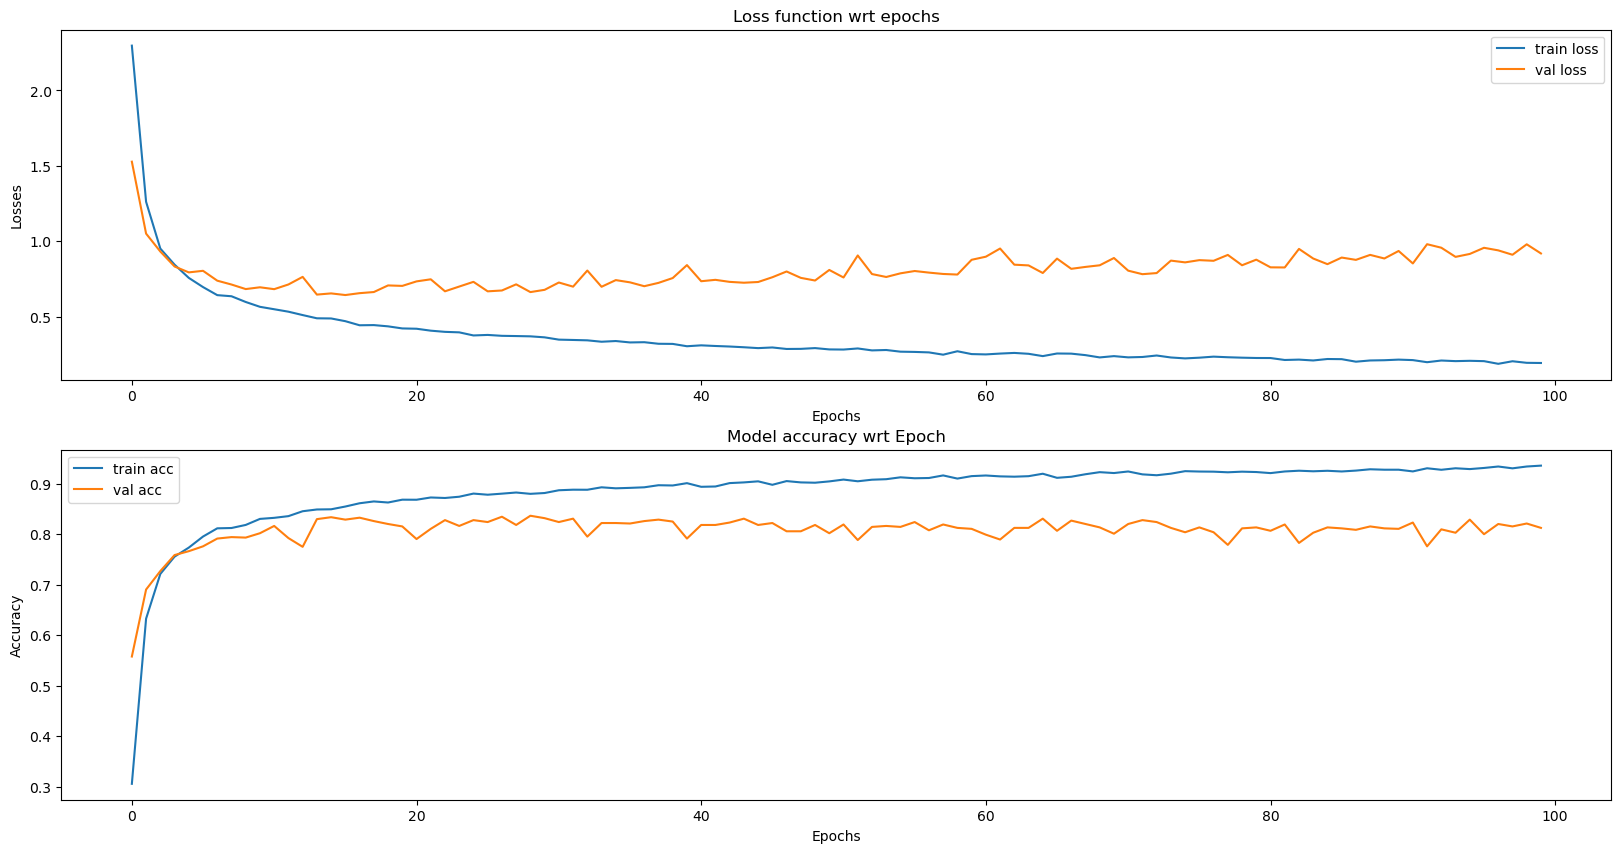

In [151]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

# Conclusion

**Specific :** Bagaimana tingkat akurasi model captcha breaker dalam mengidentifikasi karakter pada captcha ?

Tingkat akurasi model captcha breaker dalam mengidentifikasi karakter pada captcha tergolong bagus dari jumlah karakter yang diidentifikasi dengan benar dibandingkan dengan total jumlah karakter dalam captcha yang diuji dengan akurasi 0,83 dengan skala 1.

**Measurable:** Berapa jumlah karakter yang diidentifikasi dengan benar oleh model dalam 20 percobaan? 

Dalam 6 percobaan, model captcha breaker berhasil mengidentifikasi dengan benar 25 dari total 30 karakter dalam captcha.

**Action-oriented :** Bagaimana model captcha breaker dapat ditingkatkan untuk meningkatkan tingkat akurasi pengenalan karakter pada captcha ?


Meningkatkan jumlah data pelatihan dengan menambahkan variasi captcha yang lebih luas


Melakukan analisis kesalahan untuk memahami pola kesalahan yang sering terjadi dan mengambil langkah-langkah korekti

.
Memperdalam arsitektur model dengan menambahkan lebih banyak lapisan atau mengubah parameter pelatihan.

**Relevan :** Apakah penggunaan teknik deep learning efektif dalam meningkatkan akurasi pengenalan karakter pada captcha ?

Penggunaan teknik deep learning telah terbukti efektif dalam meningkatkan akurasi pengenalan karakter pada captcha. Dengan menggunakan deep learning, model dapat belajar fitur-fitur kompleks dari gambar captcha dan dapat meningkatkan kemampuannya untuk mengenali karakter dengan akurasi yang lebih tinggi. 
